In [43]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time
import matplotlib.pyplot as plt

import numpy as np

import denoise
import noise_estimator
import util_plot


import caiman as cm





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
from skimage import io
mov = io.imread('example_movies/demoMovie.tif').transpose([1,2,0])
print(mov.shape)

(60, 80, 2000)


### Spatial denoiser

To denoise the video spatially, we employ an anisotropic Wiener Filter. Each pixel is denoised by strengthening its covariance with neighboring pixels, but accounting for the different noise levels estimated for each pixel in the group via their PSD.

In [45]:
mov_wf = denoise.spatial(mov, gHalf=[2,2])

first k pixels 0
first k pixels 1000
first k pixels 2000
first k pixels 3000
first k pixels 4000


(60, 80, 2000)
Local correlation:  range [6.1e-02 9.7e-01]
(60, 80, 2000)
Local correlation:  range [-1.7e-02 9.7e-01]
(60, 80, 2000)
Local correlation:  range [-1.9e-02 5.1e-02]


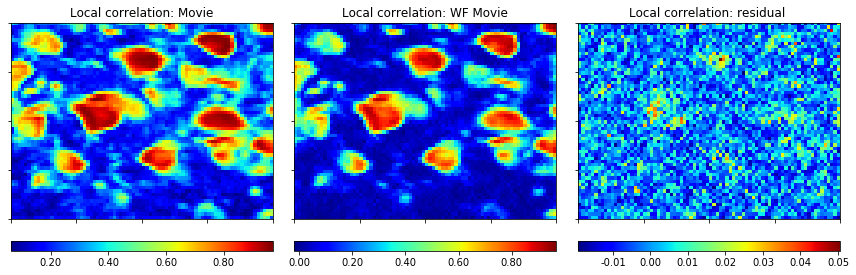

In [46]:
util_plot.comparison_plot([mov, mov_wf],
                          option='corr',
                          titles_=['Movie', 'WF Movie'],
                          plot_orientation='vertical',
                          cbar_orientation='horizontal'
                         )

### Temporal denoiser

The video can be denoised temporally through block PCA. We begin by subtracting the mean and normalizing each pixel by the noise variance. The video is partitioned in tiles (~ soma size). PCA is applied to each tile to extract spatial and temporal components. The temporal components with Gaussian like autocorrelation are rejected. When the SNR is low, some block artifacts can be present. To compensate for this, we run this approach 3x more using 1/2 off grids (row-,column-, and row&column- wise) of the original block partitions. The then average these results to obtain a single denoised movie.

In [47]:
noise_level = denoise.noise_level(mov_wf,
                                  range_ff=[0.25,0.5])
mov_nn = mov_wf/noise_level[:,:,np.newaxis]

Partition the movie in tiles smaller than the avg soma size.

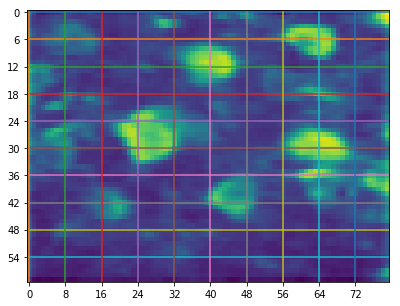

In [48]:
nblocks=[10,10]
Cn1 = cm.local_correlations(mov_nn)
util_plot.tiling_grid_plot(Cn1,
                           nblocks=nblocks,
                           plot_option='same')

Set dx to either {1,4} (number of denoisers) depending on SNR.<br/>
We begin by running the denoiser as vanilla PCA (greedy= False).<br/>
See function comments for detailed descriptions.<br/>

In [49]:
mov_d,ranks = denoise.temporal(mov_nn,
                               nblocks=nblocks,
                               greedy= False,
                               dx=4)

	M	rank: 9	run_time: 2.405020
	M	rank: 12	run_time: 2.606965
	M	rank: 15	run_time: 2.695128
	M	rank: 12	run_time: 2.770234
	M	rank: 21	run_time: 2.764715
	M	rank: 11	run_time: 2.805563
	M	rank: 7	run_time: 2.827427
	M	rank: 9	run_time: 2.824641
	M	rank: 15	run_time: 2.778188
	M	rank: 10	run_time: 2.846701
	M	rank: 17	run_time: 2.871048
	M	rank: 14	run_time: 2.879380
	M	rank: 19	run_time: 2.877620
	M	rank: 9	run_time: 2.906191
	M	rank: 11	run_time: 2.886603
	M	rank: 19	run_time: 2.886378
	M	rank: 13	run_time: 2.935837
	M	rank: 10	run_time: 2.876540
	M	rank: 10	run_time: 2.788025
	M	rank: 8	run_time: 2.871722
	M	rank: 16	run_time: 2.861140
	M	rank: 7	run_time: 2.901620
	M	rank: 12	run_time: 2.863501
	M	rank: 8	run_time: 2.249667
	M	rank: 14	run_time: 2.859400
	M	rank: 8	run_time: 2.530862
	M	rank: 11	run_time: 2.812788
	M	rank: 16	run_time: 2.680604
	M	rank: 9	run_time: 2.852754
	M	rank: 13	run_time: 2.876778
	M	rank: 16	run_time: 2.632720
	M	rank: 19	run_time: 2.827129
	M	rank: 15	run_t

(60, 80, 2000)
Local correlation:  range [-1.7e-02 9.7e-01]
(60, 80, 2000)
Local correlation:  range [2.2e-02 1.0e+00]
(60, 80, 2000)
Local correlation:  range [-1.9e-02 7.7e-02]


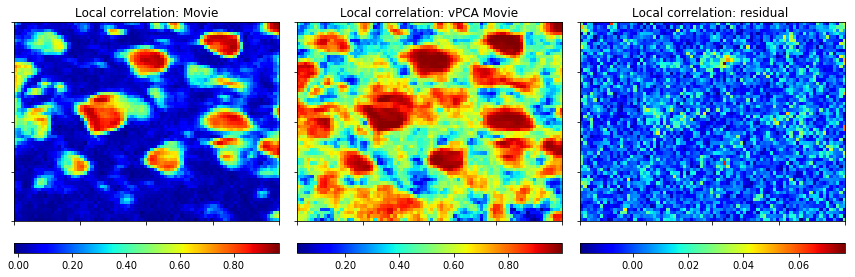

In [50]:
util_plot.comparison_plot([mov_nn, mov_d],
                          option='corr',
                          titles_=['WF Movie', 'vPCA Movie'],
                          plot_orientation='vertical',
                          cbar_orientation='horizontal'
                         )

Visualize rank of each tile

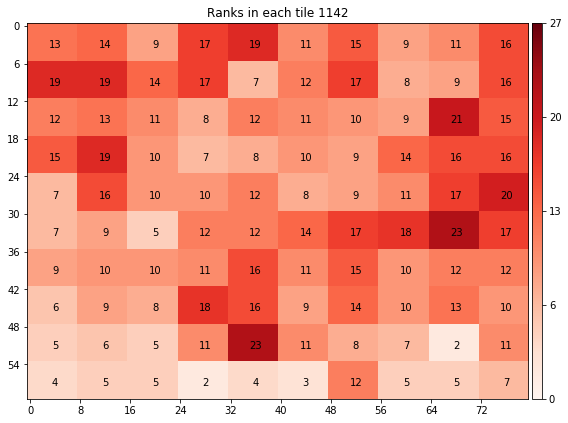

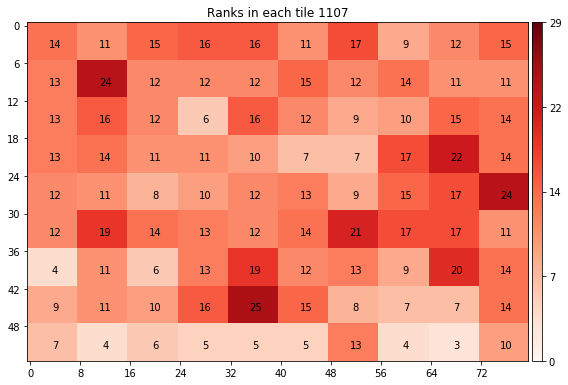

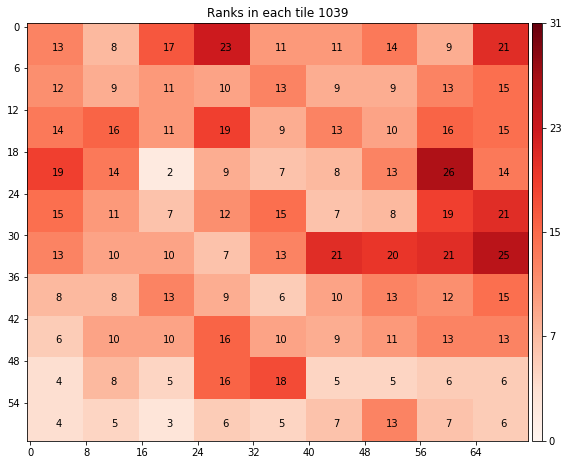

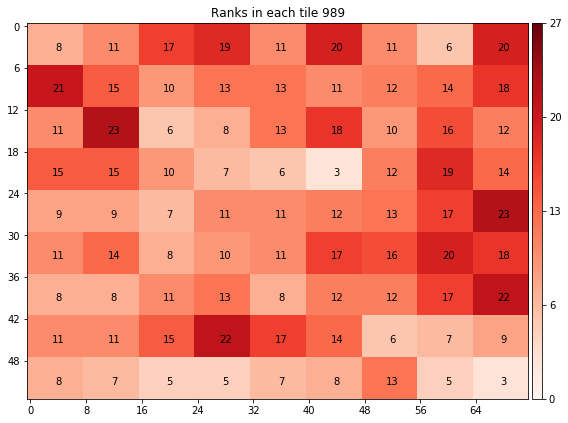

In [51]:
dims =mov_nn.shape
_ = util_plot.cn_ranks_dx_plot(ranks,dims,
                               nblocks=nblocks,
                               figsize=8,
                               fontsize=10)

Run greedy denoiser

In [52]:
mov_d,ranks = denoise.temporal(mov_nn,
                               nblocks=nblocks,
                               greedy= True,
                               dx=4)

	M	rank: 12	run_time: 1.781235
	M	rank: 12	run_time: 2.562967
	M	rank: 11	run_time: 2.653191
	M	rank: 15	run_time: 2.719321
	M	rank: 13	run_time: 2.758501
	M	rank: 19	run_time: 2.695219
	M	rank: 19	run_time: 2.745728
	M	rank: 14	run_time: 2.790477
	M	rank: 9	run_time: 2.807923
	M	rank: 8	run_time: 2.702125
	M	rank: 7	run_time: 2.798331
	M	rank: 21	run_time: 2.774139
	M	rank: 9	run_time: 2.799938
	M	rank: 17	run_time: 2.802480
	M	rank: 10	run_time: 2.794167
	M	rank: 11	run_time: 2.811882
	M	rank: 9	run_time: 2.757948
	M	rank: 7	run_time: 2.743717
	M	rank: 10	run_time: 2.817696
	M	rank: 15	run_time: 2.849293
	M	rank: 12	run_time: 2.749710
	M	rank: 16	run_time: 2.803876
	M	rank: 10	run_time: 2.849437
	M	rank: 13	run_time: 2.691183
	M	rank: 8	run_time: 2.049067
	M	rank: 11	run_time: 2.439704
	M	rank: 15	run_time: 2.587981
	M	rank: 16	run_time: 2.757599
	M	rank: 14	run_time: 2.722516
	M	rank: 10	run_time: 2.674702
	M	rank: 9	run_time: 2.770548
	M	rank: 16	run_time: 2.703820
	M	rank: 19	run_

(60, 80, 2000)
Local correlation:  range [-1.7e-02 9.7e-01]
(60, 80, 2000)
Local correlation:  range [2.2e-02 1.0e+00]
(60, 80, 2000)
Local correlation:  range [-1.9e-02 7.7e-02]


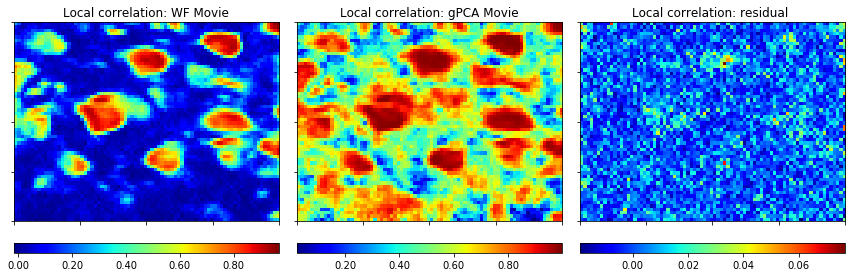

In [55]:
util_plot.comparison_plot([mov_nn, mov_d],
                          option='corr',
                          titles_=['WF Movie', 'gPCA Movie'],
                          plot_orientation='vertical',
                          cbar_orientation='horizontal'
                         )

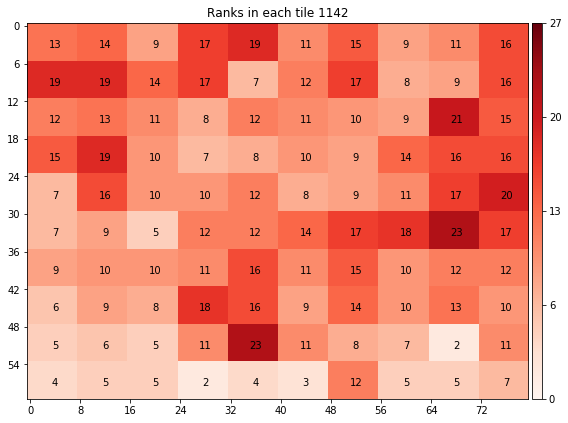

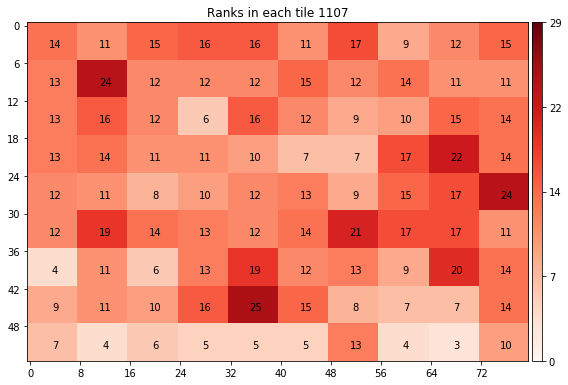

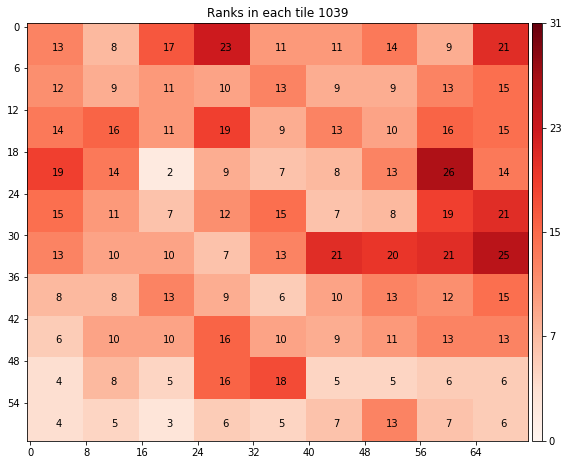

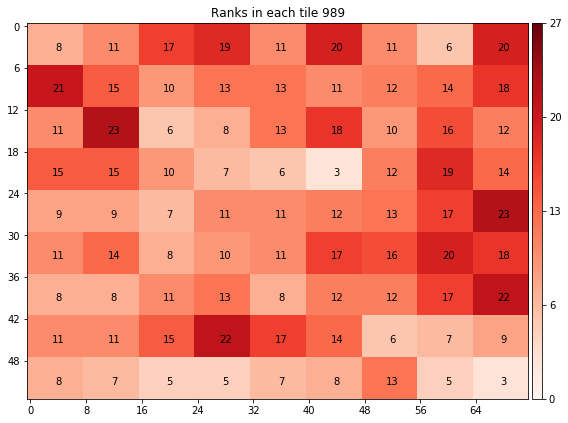

In [56]:
dims =mov_nn.shape
_ = util_plot.cn_ranks_dx_plot(ranks,
                               dims,
                               nblocks=nblocks,
                               figsize=8,fontsize=10)

Reconstruct movie for final comparison

In [57]:
mov_den = mov_d*noise_level[:,:,np.newaxis]

(60, 80, 2000)
Local correlation:  range [6.1e-02 9.7e-01]
(60, 80, 2000)
Local correlation:  range [2.2e-02 1.0e+00]
(60, 80, 2000)
Local correlation:  range [-2.0e-02 1.8e-01]


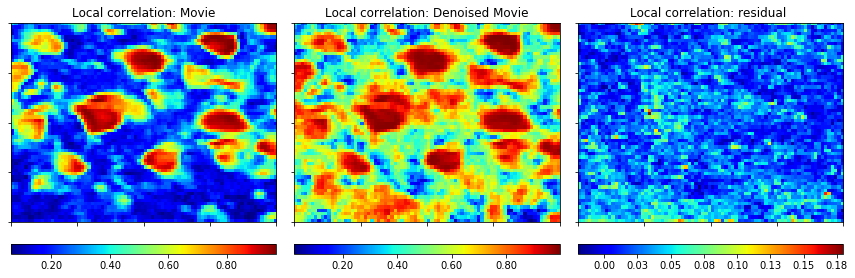

In [58]:
util_plot.comparison_plot([mov, mov_den],
                          option='corr',
                          titles_=['Movie', 'Denoised Movie'],
                          plot_orientation='vertical',
                          cbar_orientation='horizontal'
                         )